# Project: Visualization with PowerBI
> We are going to examine the overall sentiment of twitter users (Nigerians only) at any given point in time, the extracted data is gotten from the last one week with a maximum of 20000 rows.


## Workflow
>Webscraping using snscrape
>>The snscrape library is used to scrape 20000 tweets posted from a specific location(Nigeria) within a specific time range(past one weeek)
>>Saving the scraped tweets into a dataframe and csv file for further analysis 

>Data wrangling
>>Cleaning the data by removing columns with at least 70% row nulls, for those with less than 30% rows nulls, replace with ‘Not Available’, for integer type, replace with mean values in the column.
>>Restrict your data to only english
>>Extract the Polarity and Subjectivity of each tweet
>>Remove what you call stop words from your tweets


## Webscraping

In [2]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools
from datetime import datetime

# Set the location coordinates for Nigeria
loc = '9.0820, 8.6753, 923768km'

# Define the start and end dates for scraping
since_date = '2023-02-18'
until_date = '2023-02-24'

# Define the number of tweets to scrape
num_tweets = 20000

# Start the timer for scraping duration
start_time = datetime.now()

# Scrape the tweets using snscrape and the defined parameters
tweets = itertools.islice(sntwitter.TwitterSearchScraper(
    f"geocode:\"{loc}\" since:{since_date} until:{until_date}").get_items(), num_tweets)

# Convert the scraped tweets to a pandas DataFrame
df = pd.DataFrame(tweets)

# End the timer for scraping duration
end_time = datetime.now()

# Print the duration of the scraping process
print('Duration: {}'.format(end_time - start_time))

# Print the DataFrame containing the scraped tweets
print(df)


Duration: 0:20:10.831742
                                                     url  \
0      https://twitter.com/frontend_Buck/status/16289...   
1      https://twitter.com/m_a_r_v_e__t/status/162890...   
2      https://twitter.com/CMbouss/status/16289075567...   
3      https://twitter.com/sboyeret/status/1628907556...   
4      https://twitter.com/Teddy__cash/status/1628907...   
...                                                  ...   
19995  https://twitter.com/FBN_help/status/1628896250...   
19996  https://twitter.com/KMAX3377/status/1628896250...   
19997  https://twitter.com/sopheeloveslife/status/162...   
19998  https://twitter.com/Nattie_Best/status/1628896...   
19999  https://twitter.com/DivineOwali7_/status/16288...   

                           date  \
0     2023-02-23 23:59:59+00:00   
1     2023-02-23 23:59:59+00:00   
2     2023-02-23 23:59:59+00:00   
3     2023-02-23 23:59:59+00:00   
4     2023-02-23 23:59:59+00:00   
...                         ...   
19995 202

In [3]:
df.head()

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
0,https://twitter.com/frontend_Buck/status/16289...,2023-02-23 23:59:59+00:00,@_SisiCalabar You know you shared with someone...,@_SisiCalabar You know you shared with someone...,1628907557107408898,"{'username': 'frontend_Buck', 'id': 715686719,...",1,0,0,0,...,1.628845e+18,"{'username': '_SisiCalabar', 'id': 3377388035,...","[{'username': '_SisiCalabar', 'id': 3377388035...",None,None,None,None,None,14.0,None
1,https://twitter.com/m_a_r_v_e__t/status/162890...,2023-02-23 23:59:59+00:00,@Playboydayo_ What are you pressing 🌚,@Playboydayo_ What are you pressing 🌚,1628907557023625217,"{'username': 'm_a_r_v_e__t', 'id': 13378895876...",1,0,0,0,...,1.628869e+18,"{'username': 'Playboydayo_', 'id': 14249821126...","[{'username': 'Playboydayo_', 'id': 1424982112...",None,None,None,None,None,24.0,None
2,https://twitter.com/CMbouss/status/16289075567...,2023-02-23 23:59:59+00:00,Ils disent qu'ils ne parlent que quand la cham...,Ils disent qu'ils ne parlent que quand la cham...,1628907556713254914,"{'username': 'CMbouss', 'id': 7094039134018519...",0,0,0,0,...,NaN,None,None,None,None,None,None,None,11.0,None
3,https://twitter.com/sboyeret/status/1628907556...,2023-02-23 23:59:59+00:00,@retstyles https://t.co/BZTCIcdlW1,@retstyles https://t.co/BZTCIcdlW1,1628907556583120896,"{'username': 'sboyeret', 'id': 157403276106475...",0,0,0,0,...,1.628907e+18,"{'username': 'retstyles', 'id': 15144397921880...","[{'username': 'retstyles', 'id': 1514439792188...",None,None,None,None,None,32.0,None
4,https://twitter.com/Teddy__cash/status/1628907...,2023-02-23 23:59:59+00:00,@jeffre__ I'm here oh,@jeffre__ I'm here oh,1628907556453351426,"{'username': 'Teddy__cash', 'id': 131924568836...",0,0,0,0,...,1.628884e+18,"{'username': 'jeffre__', 'id': 467297011, 'dis...","[{'username': 'jeffre__', 'id': 467297011, 'di...",None,None,None,None,None,48.0,None


In [7]:
df.to_csv('random_tweets.csv',index=False)

In [21]:
df1= pd.read_csv('random_tweets.csv')

In [22]:
df1.head()

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
0,https://twitter.com/frontend_Buck/status/16289...,2023-02-23 23:59:59+00:00,@_SisiCalabar You know you shared with someone...,@_SisiCalabar You know you shared with someone...,1628907557107408898,"{'username': 'frontend_Buck', 'id': 715686719,...",1,0,0,0,...,1.628845e+18,"{'username': '_SisiCalabar', 'id': 3377388035,...","[{'username': '_SisiCalabar', 'id': 3377388035...",NaN,NaN,NaN,NaN,NaN,14.0,NaN
1,https://twitter.com/m_a_r_v_e__t/status/162890...,2023-02-23 23:59:59+00:00,@Playboydayo_ What are you pressing 🌚,@Playboydayo_ What are you pressing 🌚,1628907557023625217,"{'username': 'm_a_r_v_e__t', 'id': 13378895876...",1,0,0,0,...,1.628869e+18,"{'username': 'Playboydayo_', 'id': 14249821126...","[{'username': 'Playboydayo_', 'id': 1424982112...",NaN,NaN,NaN,NaN,NaN,24.0,NaN
2,https://twitter.com/CMbouss/status/16289075567...,2023-02-23 23:59:59+00:00,Ils disent qu'ils ne parlent que quand la cham...,Ils disent qu'ils ne parlent que quand la cham...,1628907556713254914,"{'username': 'CMbouss', 'id': 7094039134018519...",0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN
3,https://twitter.com/sboyeret/status/1628907556...,2023-02-23 23:59:59+00:00,@retstyles https://t.co/BZTCIcdlW1,@retstyles https://t.co/BZTCIcdlW1,1628907556583120896,"{'username': 'sboyeret', 'id': 157403276106475...",0,0,0,0,...,1.628907e+18,"{'username': 'retstyles', 'id': 15144397921880...","[{'username': 'retstyles', 'id': 1514439792188...",NaN,NaN,NaN,NaN,NaN,32.0,NaN
4,https://twitter.com/Teddy__cash/status/1628907...,2023-02-23 23:59:59+00:00,@jeffre__ I'm here oh,@jeffre__ I'm here oh,1628907556453351426,"{'username': 'Teddy__cash', 'id': 131924568836...",0,0,0,0,...,1.628884e+18,"{'username': 'jeffre__', 'id': 467297011, 'dis...","[{'username': 'jeffre__', 'id': 467297011, 'di...",NaN,NaN,NaN,NaN,NaN,48.0,NaN


## Data Wrangling

In [23]:
#Drop columns with at least 70% row nulls
df1 = df1.dropna(thresh=df.shape[0]*0.3, axis=1)

#Replace remaining null values with 'Not Available'
df1 = df1.fillna('Not Available')

#Replace null values in integer columns with the mean values of the columns
for col in df.select_dtypes('number'):
    df1[col] = df1[col].fillna(df[col].mean())

In [24]:
df1.columns

Index(['url', 'date', 'rawContent', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'viewCount'],
      dtype='object')

In [26]:
df1['lang'].unique()

array(['en', 'fr', 'qme', 'pt', 'und', 'qam', 'tl', 'no', 'in', 'zxx',
       'es', 'art', 'cy', 'qht', 'it', 'et', 'qst', 'ro', 'da', 'ja',
       'ar', 'tr', 'de', 'uk', 'ht', 'eu', 'cs', 'pl', 'ko', 'ca', 'hi',
       'nl', 'sl', 'sv', 'hu', 'fi', 'vi', 'zh', 'lt', 'th', 'ru', 'is',
       'fa', 'lv'], dtype=object)

In [27]:
df1=df1[df1['lang'].isin(['en'])]

In [28]:
df1['lang'].unique()

array(['en'], dtype=object)

In [29]:
df1=df1.drop(['url','renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
      'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'viewCount'],axis=1)

In [30]:
df1 = df1.rename(columns={'rawContent': 'tweet'})

In [31]:
df1.head()

,date,tweet
0,2023-02-23 23:59:59+00:00,@_SisiCalabar You know you shared with someone...
1,2023-02-23 23:59:59+00:00,@Playboydayo_ What are you pressing 🌚
4,2023-02-23 23:59:59+00:00,@jeffre__ I'm here oh
5,2023-02-23 23:59:59+00:00,"@h_abibah Hi, girlfriend 🤭"
6,2023-02-23 23:59:59+00:00,We just knocked you out... Of course we aren't...


In [32]:
def clean_text(text): 
    pat1 = r'@[^ ]+'                   #@signs
    pat2 = r'https?://[A-Za-z0-9./]+'  #links
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'                     # hashtags
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip()

In [34]:
import re
df1["tweet"] = df1["tweet"].apply(clean_text)

In [35]:
df1['tweet']

0                     you know you shared with someone rii
1                                    what are you pressing
4                                               im here oh
5                                            hi girlfriend
6         we just knocked you out of course we arent mates
                               ...                        
19995            hi  kindly check your dm for our response
19996    now which name una go give una self after shag...
19997                                           yeah it is
19998                                hello from the future
19999          even tinubu will vote peter obi on saturday
Name: tweet, Length: 14121, dtype: object

In [36]:
df1.isnull().sum()

date     0
tweet    0
dtype: int64

In [37]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Define a function to remove stop words from a text
stop_words = set(stopwords.words('english'))
def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

#Apply the function to the 'text' column of the dataframe
df1['tweet'] = df1['tweet'].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
print("Running sentiment Analysis")

# creating two new columns(polarity and subjectivity)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df1["Subjectivity"] = df1['tweet'].apply(getSubjectivity)
df1["Polarity"] = df1['tweet'].apply(getPolarity)

Running sentiment Analysis


In [40]:
df1.head(10)

,date,tweet,Subjectivity,Polarity
0,2023-02-23 23:59:59+00:00,know shared someone rii,0.000000,0.0
1,2023-02-23 23:59:59+00:00,pressing,0.000000,0.0
4,2023-02-23 23:59:59+00:00,im oh,0.000000,0.0
5,2023-02-23 23:59:59+00:00,hi girlfriend,0.000000,0.0
6,2023-02-23 23:59:59+00:00,knocked course arent mates,0.000000,0.0
8,2023-02-23 23:59:59+00:00,informed dy play,0.000000,0.0
10,2023-02-23 23:59:58+00:00,porn dey pay need contract,0.000000,0.0
11,2023-02-23 23:59:58+00:00,dey play rehga dey play,0.000000,0.0
13,2023-02-23 23:59:58+00:00,let go get trophy sunday im confident,0.833333,0.5
15,2023-02-23 23:59:57+00:00,lmao guy wicked oh,1.000000,0.6


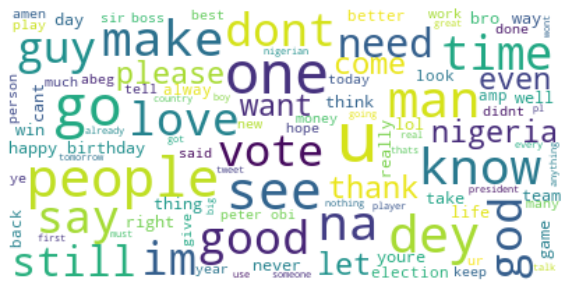

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df1['clean_tweet'] = df1['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))# Create wordcloud
text = ' '.join(df1['clean_tweet'].tolist())
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Plot the wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
tweets_df= df1.copy()

In [43]:
tweets_df.to_csv('tweets.csv',index=False)